# Correlation

In this Notebook we'll look at correlations in the Funda data set.

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
df = pd.read_csv('funda-amsterdam.csv')
df.head()

,id,address,area,bedrooms,postal_code,posting_date,price,property_type,rooms,sale_date,url,year_built
0,0,Knollendamstraat 4 III/IV,108,2,1013 TN,4-6-2016,510000,apartment,3,23-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1906
1,1,Moerdijkstraat 47 1,47,1,1079 XM,22-6-2016,215000,apartment,2,5-7-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1938
2,2,Zeeburgerdijk 349,116,2,1095 AD,9-6-2016,325000,apartment,3,8-7-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,2003
3,3,Brederodestraat 124 -1,58,2,1054 VH,14-5-2016,315000,apartment,3,2-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1910
4,4,Admiraal De Ruijterweg 409 III,63,1,1055 MD,14-6-2016,200000,apartment,3,23-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1906


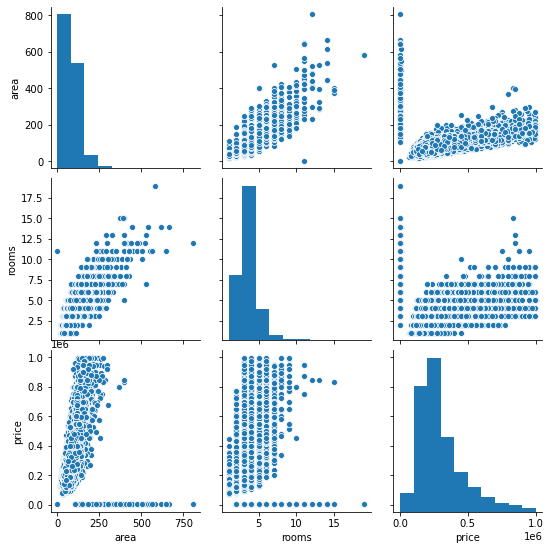

In [4]:
df_sel = df[['area', 'rooms', 'price']] #making a new dataframe with a subset
sns.pairplot(df_sel)
plt.show()

There are a few strange things happening here with some values that are equal to 0 or very small. Presumably, these are either incorrect listings or forced sales with people in debt (or something like that). Let's plot the individual variables to see what we need to cut out.

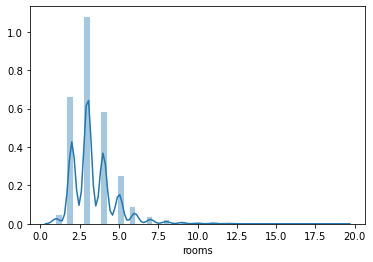

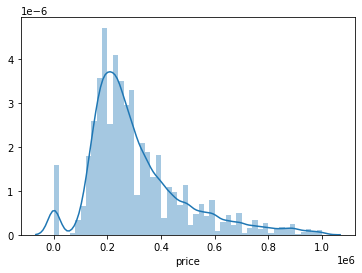

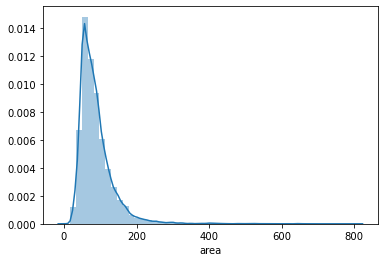

In [5]:
sns.distplot(df['rooms'])
plt.show()
sns.distplot(df['price'])
plt.show()
sns.distplot(df['area'])
plt.show()

The only thing where something really weird is going on, is price. But to be sure, let's cut out any implausible stuff if there might be any, by stating the following:

* Price above 30,000
* Area above 10 m2
* Rooms above 0

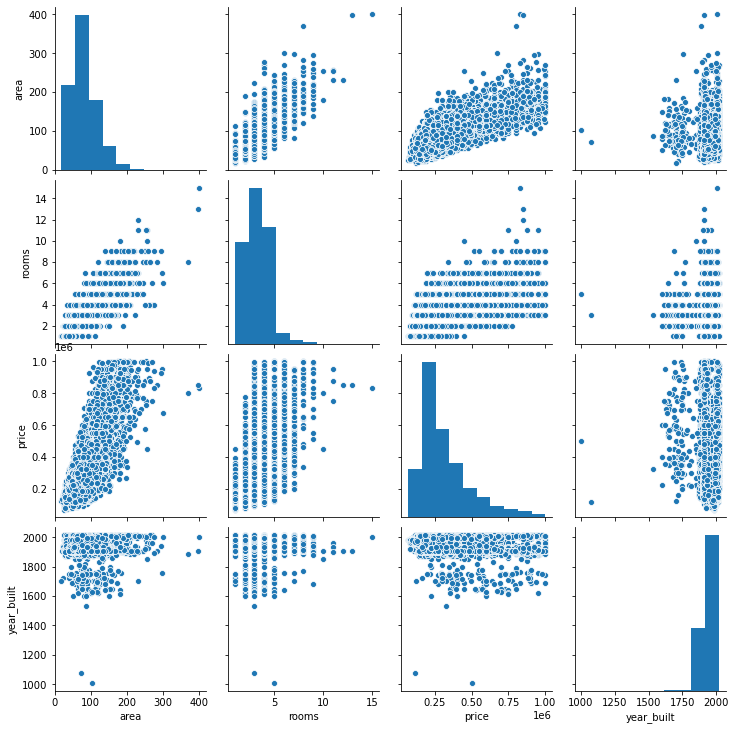

In [5]:
df = df[(df['price'] > 30000) & (df['area'] > 10) & (df['rooms'] > 0)] #we want to subset the original dataset, otherwise we lose data
df_sel = df[['area', 'rooms', 'price', 'year_built']]

sns.pairplot(df_sel)
plt.show()

In [19]:
corr = df_sel.corr()
corr

,area,rooms,price,year_built
area,1.000000,0.781526,0.725081,0.208073
rooms,0.781526,1.000000,0.540556,0.110580
price,0.725081,0.540556,1.000000,-0.166731
year_built,0.208073,0.110580,-0.166731,1.000000


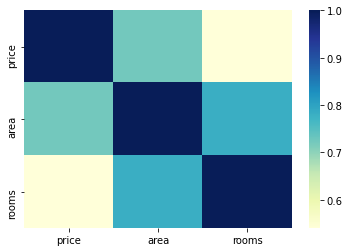

In [8]:
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap="YlGnBu") #the last two arguments set the column names
plt.show()

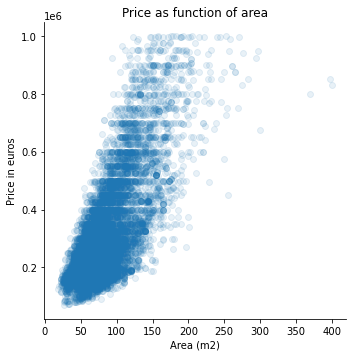

In [9]:
sns.lmplot(x='area', y='price', fit_reg=False, data=df, scatter_kws={'alpha':0.1}) #fit_reg=False leaves out the regression line; see below
plt.xlabel('Area (m2)') #use matplotlib to refine Seaborn plot
plt.ylabel('Price in euros')
plt.title('Price as function of area')
plt.show()

In [20]:
from scipy.stats.stats import pearsonr #We will need the correlation function from the scientific package scipy
print(pearsonr(df_sel['area'],df_sel['price']))

(0.7250807666953685, 0.0)


This is a strong correlation (0.73) which is highly significant (p < 0.0001)